In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# acquire/wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import acquire as acq
import prepare as prep

In [3]:
total_df = prep.prep_telco(acq.get_telco_data())

In [4]:
look = acq.peekatdata(total_df)
look

HEAD:
   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 1  0003-MKNFE   
1                4                         1                 1  0013-MHZWF   
2                1                         1                 1  0015-UOCOJ   
3                1                         1                 1  0023-HGHWL   
4                3                         1                 1  0032-PGELS   

   gender  senior_citizen partner dependents  tenure phone_service  \
0    Male               0      No         No       9           Yes   
1  Female               0      No        Yes       9           Yes   
2  Female               1      No         No       7           Yes   
3    Male               1      No         No       1            No   
4  Female               0     Yes        Yes       1            No   

       ...       churn_encode phone_id movies_encode tv_encode  \
0      ...                  0        2

In [5]:
#acq.peekatdata(df)
#df.head()

In [6]:
total_df.shape

(7032, 34)

In [7]:
total_df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'churn_encode', 'phone_id', 'movies_encode',
       'tv_encode', 'streaming_services', 'online_security_encode',
       'online_backup_encode', 'online_security_backup', 'household_type_id',
       'gender_encode'],
      dtype='object')

In [8]:
df = total_df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 34 columns):
payment_type_id             7032 non-null int64
internet_service_type_id    7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null object
dependents                  7032 non-null object
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
streaming_tv                7032 non-null object
streaming_movies            7032 non-null object
paperless_billing           7032 non-null object
monthly_charges 

In [17]:
df[['tech_support', 'paperless_billing']].sample(5)

,tech_support,paperless_billing
4577,No,No
1090,No,Yes
2893,Yes,Yes
6998,No internet service,No
4256,No,Yes


In [ ]:
df.total_charges.sort_values()

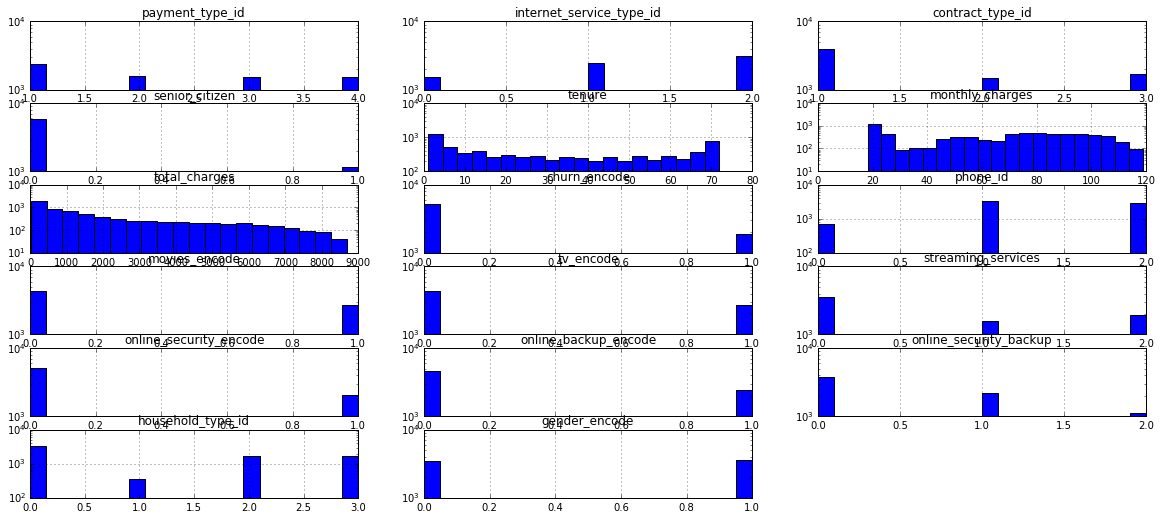

In [14]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'churn_encode', 'phone_id', 'movies_encode',
       'tv_encode', 'streaming_services', 'online_security_encode',
       'online_backup_encode', 'online_security_backup', 'household_type_id',
       'gender_encode']):
    plot_number = i + 1
    series = df[col]
    plt.subplot(7, 3, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=True)

## Split into X's, y's and Train/Tests

In [ ]:
X = df[['household_type_id','internet_service_type_id','gender']]
y = df[['churn_encode']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 123)

## Logistic Regression fitting

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [ ]:
print('Columns: \n:', X_train.columns)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
y_pred

#### Probability of Stay vs Churn 

In [ ]:
y_pred_proba

#### Accuracy 

In [ ]:
(y_train['churn_encode'] == y_pred).sum() / y_train.shape[0]